## Relax Take-Home Challenge
### Ruth Caswell Smith

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

### Create a dataframe of users and adoption

In [22]:
takehome_user_engagement = pd.read_csv('takehome_user_engagement.csv', parse_dates=[0])

In [23]:
takehome_user_engagement.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [24]:
takehome_user_engagement.dtypes

time_stamp    datetime64[ns]
user_id                int64
visited                int64
dtype: object

In [25]:
takehome_user_engagement['visited'].value_counts()

1    207917
Name: visited, dtype: int64

In [26]:
takehome_user_engagement['user_id'].nunique()

8823

In [27]:
takehome_user_engagement.sort_values(by=['user_id','time_stamp'], inplace=True)

In [38]:
takehome_user_engagement.loc[0]

time_stamp    2014-04-22 03:53:30
user_id                         1
visited                         1
Name: 0, dtype: object

In [36]:
takehome_user_engagement.shape[0]

207917

In [66]:
def is_adopted(times):
    '''takes a list of times and returns True if there are three consecutive timestamps within 7 days'''
    adopted = False
    ind=0
    while ind < (len(times)-2):
        if (times[ind+2] - times[ind]).days <= 7:
            return True
        ind += 1
    return False

In [86]:
adopted_users = {}
row_ind = 0
max_row = takehome_user_engagement.shape[0]

while row_ind < max_row:
    user = takehome_user_engagement.loc[row_ind][1]
    timestamps_for_user = list(takehome_user_engagement[takehome_user_engagement['user_id']==user]['time_stamp'])
    adopted_users[user] = is_adopted(timestamps_for_user)
    row_ind = row_ind + len(timestamps_for_user)

In [91]:
adopted_users = pd.DataFrame.from_dict(adopted_users, orient='index')

In [110]:
adopted_users.dtypes

adopted    bool
dtype: object

In [93]:
adopted_users.columns=['adopted']

In [96]:
adopted_users['adopted'].sum() / adopted_users['adopted'].count()

0.18769126147568854

### Join dataframes

In [102]:
takehome_users = pd.read_csv('takehome_users.csv', encoding = "ISO-8859-1", index_col=0)

In [103]:
takehome_users.head()

,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
object_id,,,,,,,,,
1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [107]:
joined_df = takehome_users.join(adopted_users)

In [112]:
joined_df['adopted'].sum()

1656

In [109]:
joined_df.dtypes

creation_time                  object
name                           object
email                          object
creation_source                object
last_session_creation_time    float64
opted_in_to_mailing_list        int64
enabled_for_marketing_drip      int64
org_id                          int64
invited_by_user_id            float64
adopted                        object
dtype: object

In [116]:
joined_df['adopted'] = joined_df['adopted'].astype(bool)
joined_df['opted_in_to_mailing_list'] = joined_df['opted_in_to_mailing_list'].astype(bool)
joined_df['enabled_for_marketing_drip'] = joined_df['enabled_for_marketing_drip'].astype(bool)

In [117]:
joined_df.dtypes

creation_time                  object
name                           object
email                          object
creation_source                object
last_session_creation_time    float64
opted_in_to_mailing_list         bool
enabled_for_marketing_drip       bool
org_id                          int64
invited_by_user_id            float64
adopted                          bool
dtype: object

In [118]:
joined_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12000 entries, 1 to 12000
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   creation_time               12000 non-null  object 
 1   name                        12000 non-null  object 
 2   email                       12000 non-null  object 
 3   creation_source             12000 non-null  object 
 4   last_session_creation_time  8823 non-null   float64
 5   opted_in_to_mailing_list    12000 non-null  bool   
 6   enabled_for_marketing_drip  12000 non-null  bool   
 7   org_id                      12000 non-null  int64  
 8   invited_by_user_id          6417 non-null   float64
 9   adopted                     12000 non-null  bool   
dtypes: bool(3), float64(2), int64(1), object(4)
memory usage: 1.1+ MB


Note that invited_by_user_id is a float because it has null values.

### Exploratory Data Analysis

Let's explore correlation with creation_source

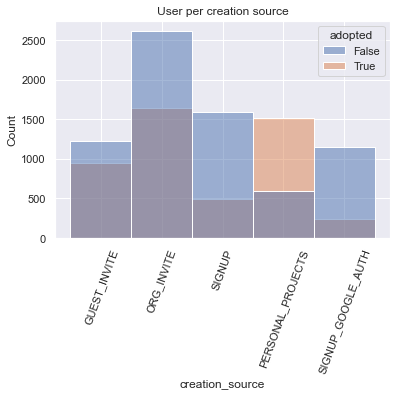

In [121]:
sns.histplot(x="creation_source", hue="adopted",  data=joined_df)
plt.xticks(rotation=70)
plt.title("User per creation source");

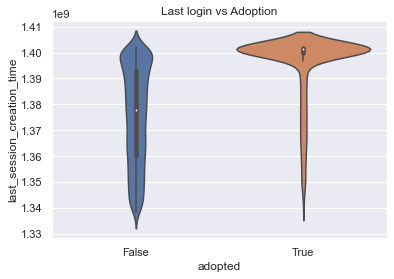

In [127]:
sns.violinplot(x='adopted', y='last_session_creation_time',data=joined_df, size=3)
plt.title('Last login vs Adoption');

In [151]:
joined_df['invited'] = (~ joined_df['invited_by_user_id'].isnull())

In [158]:
(~joined_df['invited'] & (joined_df['adopted'])).sum()

2249

In [160]:
2249/(2249+3334)

0.4028300197026688

In [161]:
joined_df['org_id'].nunique()

417